In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import pearsonr

## 데이터 불러오기

In [3]:
df = pd.read_csv('/content/media prediction and its cost.csv')
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42096 entries, 0 to 42095
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               42096 non-null  object 
 1   food_department             42096 non-null  object 
 2   food_family                 42096 non-null  object 
 3   store_sales(in millions)    42096 non-null  float64
 4   store_cost(in millions)     42096 non-null  float64
 5   unit_sales(in millions)     42096 non-null  float64
 6   promotion_name              42096 non-null  object 
 7   sales_country               42096 non-null  object 
 8   marital_status              42096 non-null  object 
 9   gender                      42096 non-null  object 
 10  total_children              42096 non-null  float64
 11  education                   42096 non-null  object 
 12  member_card                 42096 non-null  object 
 13  occupation                  420

- food_category (가장 구체적)
특정 유형의 제품, ex) 냉동 식품 부서의 ‘냉동 피자’
-food_department (중간 단계 분류)
특정 유형의 제품이나 서비스 기반, ex) ‘냉동 식품’, ‘신선 식품’
-food_family (가장 넓은 분류)
여러 음식 카테고리 포괄, ex) ‘음료’, ‘간식’
-store_sales(in millions) : 매장 매출
-store_cost(in millions) : 매장 비용
-unit_sales(in millions) : 단위 매출
-promotion_name : 프로모션 이름
-sales_country : 판매 국가
-marital_status : 결혼 상태
-gender : 성별
-total_children : 총 자녀 수
-education : 최종 학력
-member_card : 맴버십 카드
-occupation : 직업
-houseowner : 주택 소유 여부
-avg_cars_at home(approx) : 집에있는 차량
-avg. yearly_income : 평균 연간 수입
-num_children_at_home : 미취학 자녀 수
-brand_name : 판매된 물품의 브랜드이름
-SRP(Suggested Retail Price) : 권장 소매 가격 ( 단위 = 달러)
-gross_weight : 포장 이후 제품의 무게
-net_weight : 포장하지 않은 순수 제품의 무게
-recyclable_package : 재활용 주머니 사용
-low_fat : 저지방 제품 구매 여부
-units_per_case : 케이스나 상자에 포장되어 있는 제품의 개수
-store_type : 매장 유형
-store_city : 매장이 있는 도시
-store_state : 매장이 있는 주
-store_sqft : 매장 면적
-grocery_sqft : 식료품 면적
-frozen_sqft : 냉동 면적
-meat_sqft : 정육 면적
-coffee_bar : 매장 내 카페 존재 여부
-video_store : 비디오 판매점
-salad_bar : 신선야채 판매점
-prepared_food : 마트 치킨 같은 조리 식품 판매점
-florist : 꽃집
-media_type : 광고가 사용된 미디어 유형
-cost : 가격

In [5]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,42096.000000,...,42095.000000,42095.000000,42095.000000,42095.000000,42095.000000,42095.00000,42095.000000,42095.000000,42095.000000,42095.000000
mean,6.559027,2.626187,3.094094,2.535134,2.194365,0.826468,2.194365,2.121623,13.843533,11.827201,...,27990.600926,19129.517069,5316.697114,3544.408457,0.612092,0.35294,0.587386,0.587386,0.562893,99.242355
std,3.428393,1.440501,0.825596,1.489848,1.107305,1.301797,1.107305,0.923868,4.615802,4.649148,...,5705.502666,3980.813694,1580.379334,1053.452548,0.487279,0.47789,0.492310,0.492310,0.496035,29.999421
min,0.510000,0.170500,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.090000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.00000,0.000000,0.000000,0.000000,50.790000
25%,3.870000,1.518000,3.000000,1.000000,1.000000,0.000000,1.000000,1.420000,9.710000,7.770000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.00000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.386500,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.700000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.00000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.486375,4.000000,4.000000,3.000000,1.000000,3.000000,2.800000,17.700000,16.000000,...,30797.000000,22123.000000,6393.000000,4262.000000,1.000000,1.00000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.525000,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.00000,1.000000,1.000000,1.000000,149.750000


## 결측치 확인

In [6]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                1
store_type                    1
store_city                    1
store_state                   1
store_sqft                    1
grocery_sqft                  1
frozen_s

결측치가 존재하지 않음.

## 중복된 데이터 확인

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
42091    False
42092    False
42093    False
42094    False
42095    False
Length: 42096, dtype: bool

In [8]:
df[df.duplicated()]

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost


중복된 데이터 또한 존재하지 않음.

In [9]:
df.rename(columns={'avg. yearly_income': 'avg_yearly_income'}, inplace=True)

## Outlier check (boxplot)


> 들여쓴 블록



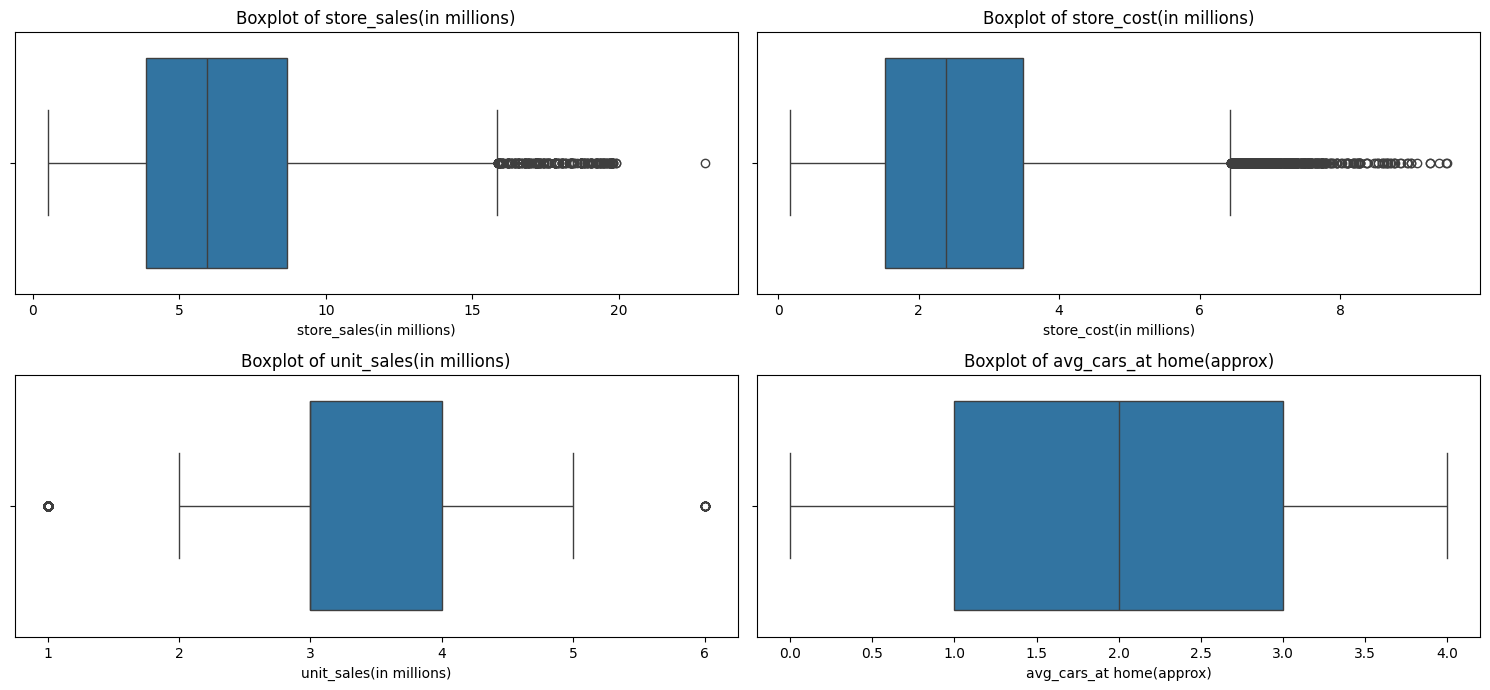

In [10]:
# Selecting numerical columns for outlier detection
numerical_columns = ['store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)',
                     'avg_cars_at home(approx)']

# Plotting boxplots for numerical columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Outlier 를 다른 값으로 대체하는 방법으로 Outlier 처리함. (중앙값)


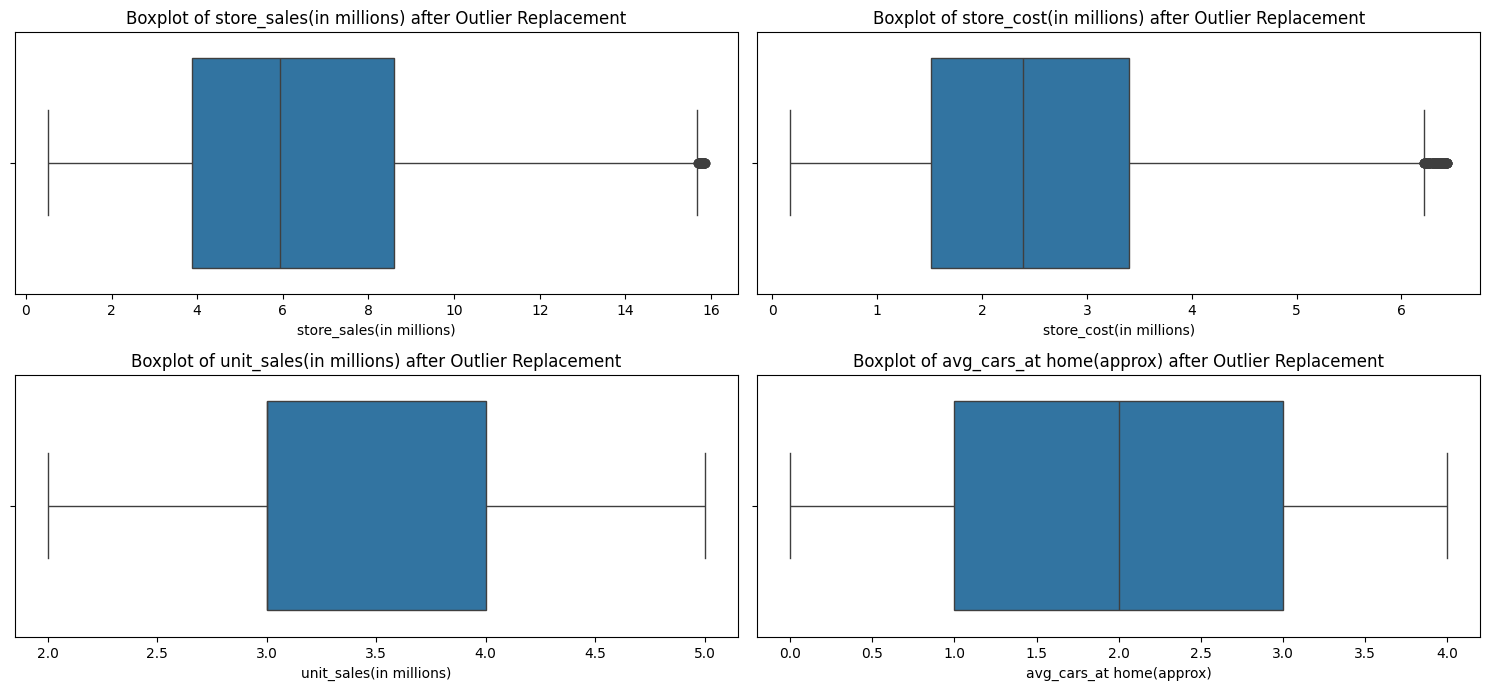

In [11]:
# Function to replace outliers with the median of the column
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Replacing outliers with the median for each numerical column
for col in numerical_columns:
    replace_outliers_with_median(df, col)

# Displaying the boxplots again to see the effect of the outlier replacement
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after Outlier Replacement')

plt.tight_layout()
plt.show()

In [12]:
# Defining the columns for the new dataset
selected_columns = [
    'num_children_at_home', 'avg_cars_at home(approx)', 'avg_yearly_income',
    'marital_status', 'gender', 'store_sales(in millions)',
    'education', 'occupation', 'houseowner',
    'store_type', 'store_city', 'store_state', 'total_children'
]

# Creating the new dataset with the selected columns
selected_df = df[selected_columns]

# Displaying the first few rows of the new dataset
selected_df.head()

,num_children_at_home,avg_cars_at home(approx),avg_yearly_income,marital_status,gender,store_sales(in millions),education,occupation,houseowner,store_type,store_city,store_state,total_children
0,1.0,1.0,$10K - $30K,M,F,7.36,Partial High School,Skilled Manual,Y,Deluxe Supermarket,Salem,OR,1.0
1,0.0,4.0,$50K - $70K,M,M,5.52,Bachelors Degree,Professional,Y,Deluxe Supermarket,Salem,OR,0.0
2,0.0,1.0,$10K - $30K,S,F,3.68,Partial High School,Manual,N,Deluxe Supermarket,Salem,OR,4.0
3,2.0,2.0,$30K - $50K,M,F,3.68,High School Degree,Manual,Y,Deluxe Supermarket,Salem,OR,2.0
4,0.0,2.0,$30K - $50K,M,M,4.08,Partial High School,Skilled Manual,N,Deluxe Supermarket,Salem,OR,0.0


## 교육 수준에 따른 결혼 상태

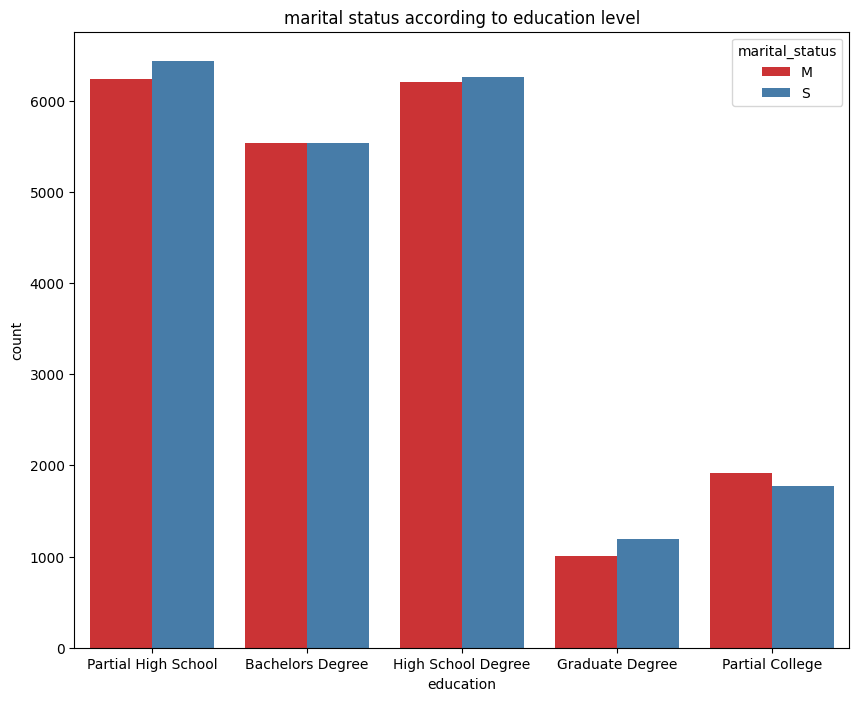

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data=selected_df, x='education', hue='marital_status', palette='Set1')
plt.title('marital status according to education level')
plt.show()

## 직업 별 아이의 수

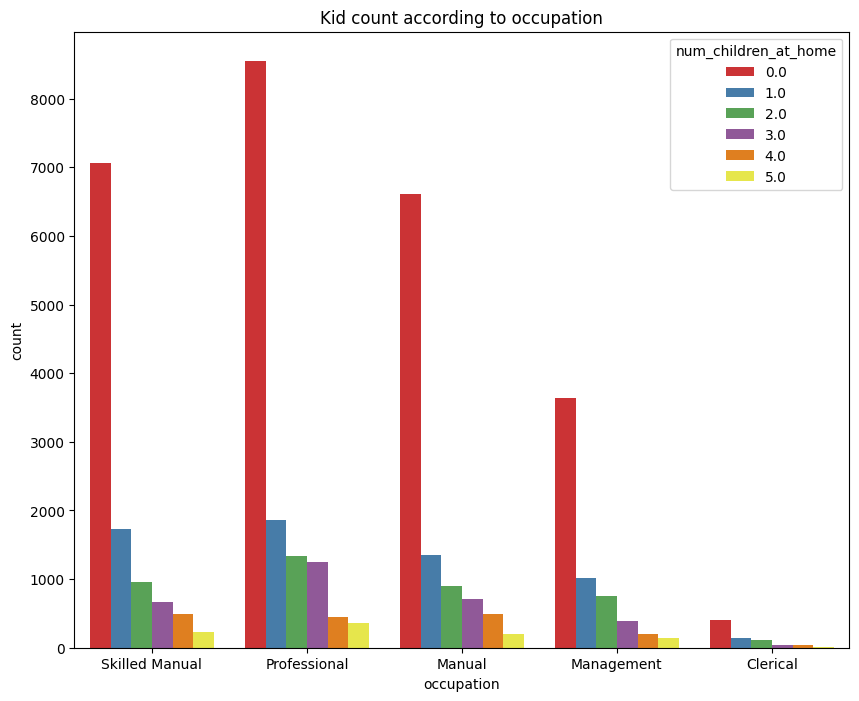

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(data=selected_df, x='occupation', hue='num_children_at_home', palette='Set1')
plt.title('Kid count according to occupation')
plt.show()

## 기술적 통계 분석

In [15]:
columns_to_describe = ['num_children_at_home', 'avg_cars_at home(approx)', 'store_sales(in millions)', 'total_children']
descriptive_stats = selected_df[columns_to_describe].describe()
print(descriptive_stats)

       num_children_at_home  avg_cars_at home(approx)  \
count          42096.000000              42096.000000   
mean               0.826468                  2.194365   
std                1.301797                  1.107305   
min                0.000000                  0.000000   
25%                0.000000                  1.000000   
50%                0.000000                  2.000000   
75%                1.000000                  3.000000   
max                5.000000                  4.000000   

       store_sales(in millions)  total_children  
count              42096.000000    42096.000000  
mean                   6.492017        2.535134  
std                    3.322330        1.489848  
min                    0.510000        0.000000  
25%                    3.870000        1.000000  
50%                    5.940000        3.000000  
75%                    8.600000        4.000000  
max                   15.850000        5.000000  


In [16]:
categorical_variable = ['marital_status', 'gender', 'avg_yearly_income', 'education', 'occupation', 'houseowner', 'store_type', 'store_city']
categorical_frequency = selected_df[categorical_variable].value_counts()
print(categorical_frequency)

marital_status  gender  avg_yearly_income  education           occupation      houseowner  store_type           store_city   
S               F       $30K - $50K        High School Degree  Skilled Manual  N           Deluxe Supermarket   Salem            142
M               F       $50K - $70K        Bachelors Degree    Professional    Y           Deluxe Supermarket   Merida           141
                        $70K - $90K        Bachelors Degree    Professional    Y           Supermarket          Spokane          140
                        $50K - $70K        Bachelors Degree    Professional    Y           Deluxe Supermarket   Tacoma           140
                M       $30K - $50K        High School Degree  Skilled Manual  Y           Supermarket          Bremerton        136
                                                                                                                                ... 
S               M       $50K - $70K        Partial College     Professional 

## 상관관계 분석

<ipython-input-17-a149ea4e0e90>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  selected_df_cor = selected_df.corr()


(4.5, -0.5)

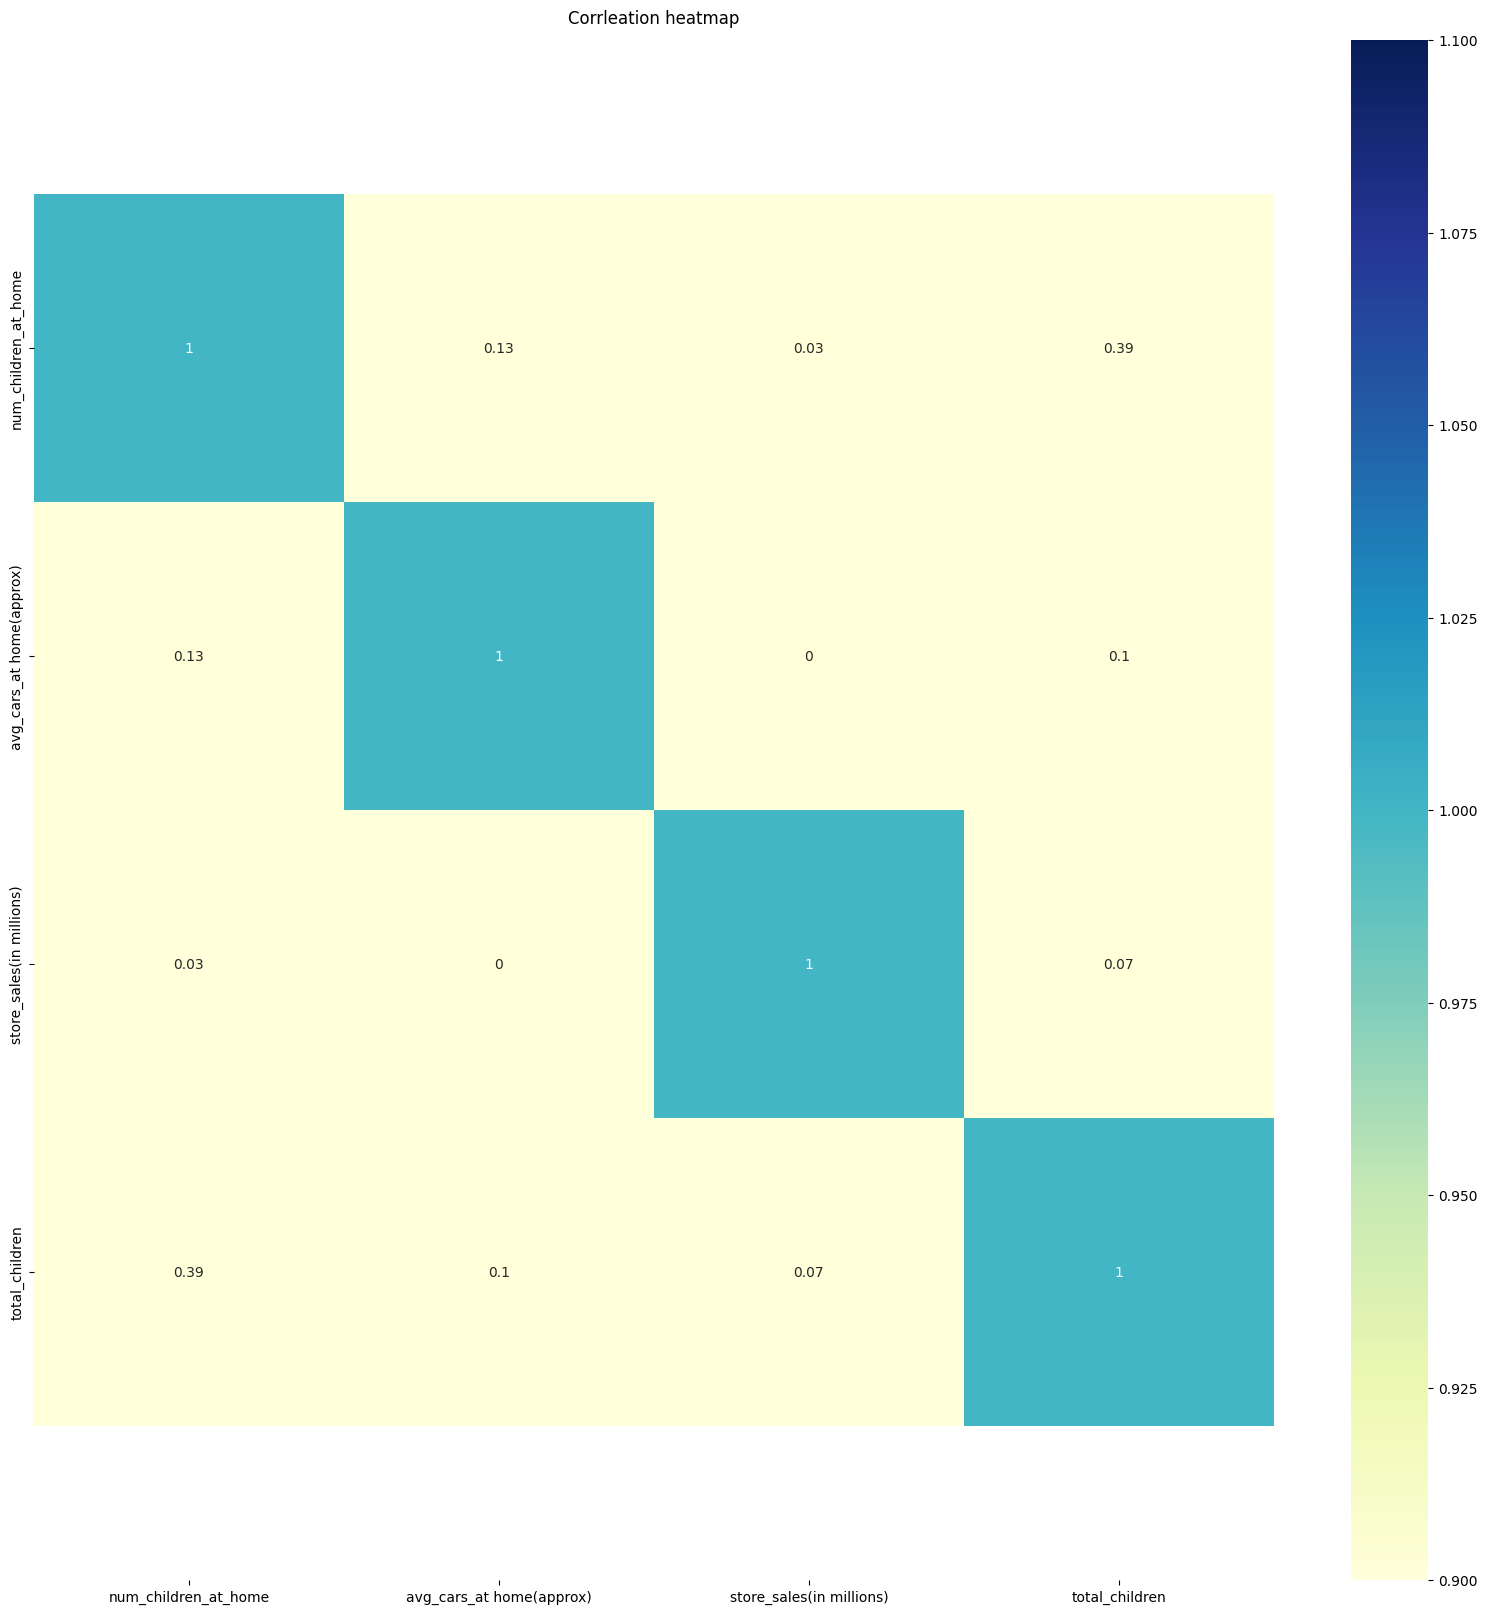

In [17]:
selected_df_cor = selected_df.corr()
plt.figure(figsize = (20, 20))
heatmap = sns.heatmap(selected_df_cor.round(2), vmin = 1, vmax = 1, cmap = "YlGnBu", annot = True)
heatmap.set_title('Corrleation heatmap',  pad = 12)

bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

## 성별에 따른 매출 분석

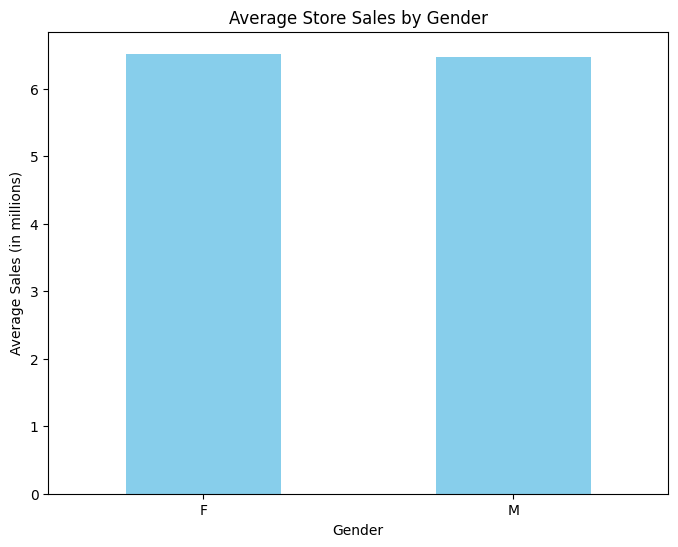

In [18]:
gender_sales = selected_df.groupby('gender')['store_sales(in millions)'].mean()

plt.figure(figsize=(8, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Average Store Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sales (in millions)')


plt.xticks(rotation=0)
plt.show()


## 결혼 상태별 매출 분석

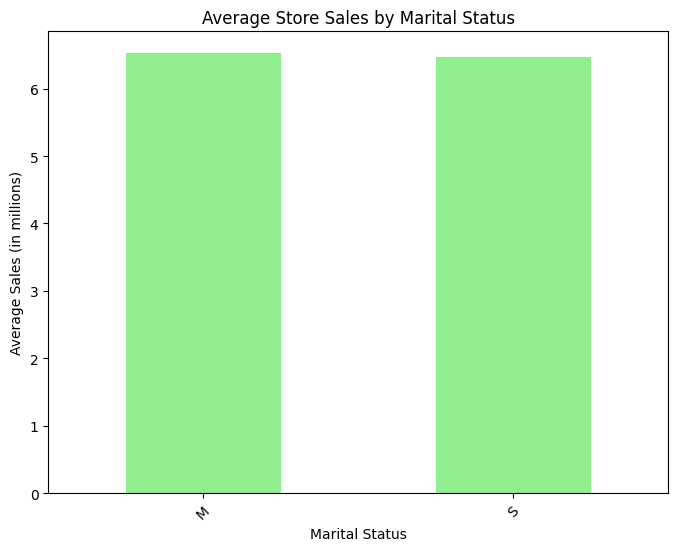

In [19]:
marital_status_sales = selected_df.groupby('marital_status')['store_sales(in millions)'].mean()

plt.figure(figsize=(8, 6))
marital_status_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Store Sales by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Sales (in millions)')


plt.xticks(rotation=45)
plt.show()


In [20]:
# 유의 수준 0.05 기준 판단
correlation_coefficient, p_value = pearsonr(selected_df['store_sales(in millions)'], pd.factorize(df['marital_status'])[0])

# 결과 출력
print(f"상관계수: {correlation_coefficient}")
print(f"p_value: {p_value}")

상관계수: -0.00909107937166061
p_value: 0.06214944279044164


## 교육 수준별 매출 분석

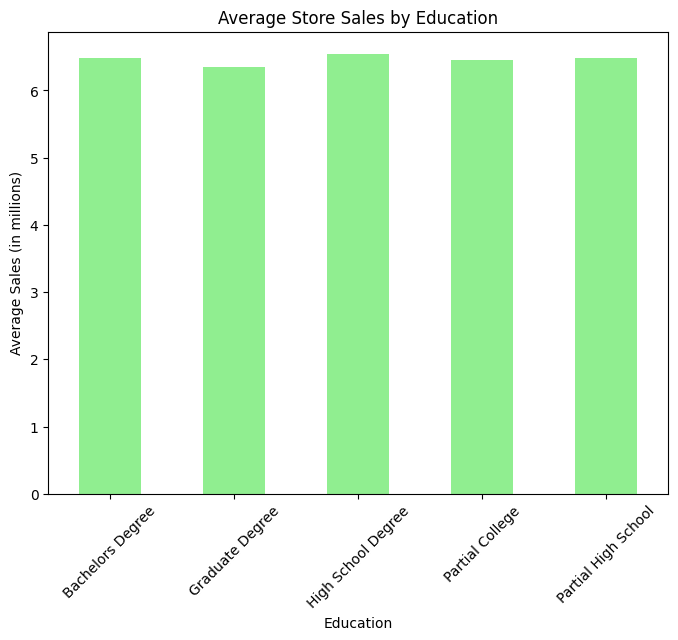

In [21]:
# 교육 수준별 매출 분석 및 시각화
education_status_sales = selected_df.groupby('education')['store_sales(in millions)'].mean()

# 시각화
plt.figure(figsize=(8, 6))
education_status_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Store Sales by Education')
plt.xlabel('Education')
plt.ylabel('Average Sales (in millions)')

plt.xticks(rotation=45)
plt.show()

In [22]:
correlation_coefficient, p_value = pearsonr(selected_df['store_sales(in millions)'], pd.factorize(df['education'])[0])

# output
print(f"상관계수: {correlation_coefficient}")
print(f"p_value: {p_value}")

상관계수: -0.0022314831153583277
p_value: 0.6470765367036315


## 직업별 매출 분석

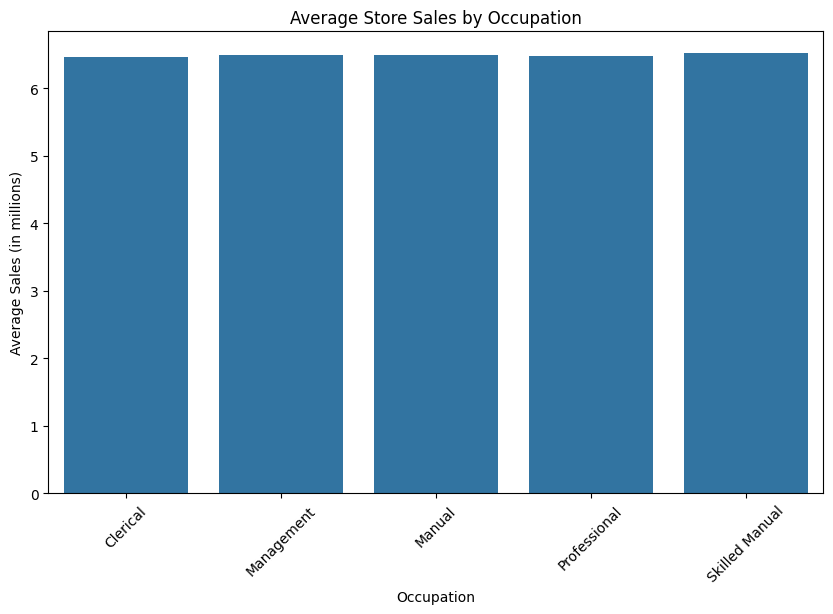

In [23]:
occupation_sales = selected_df.groupby('occupation')['store_sales(in millions)'].mean()

# visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_sales.index, y=occupation_sales.values)
plt.title('Average Store Sales by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sales (in millions)')

plt.xticks(rotation=45)
plt.show()

In [24]:
correlation_coefficient, p_value = pearsonr(selected_df['store_sales(in millions)'], pd.factorize(df['occupation'])[0])

# output
print(f"상관계수: {correlation_coefficient}")
print(f"p_value: {p_value}")

상관계수: -0.00277939237368615
p_value: 0.5685144475677234


## 가정 주택 소유 여부별 매출

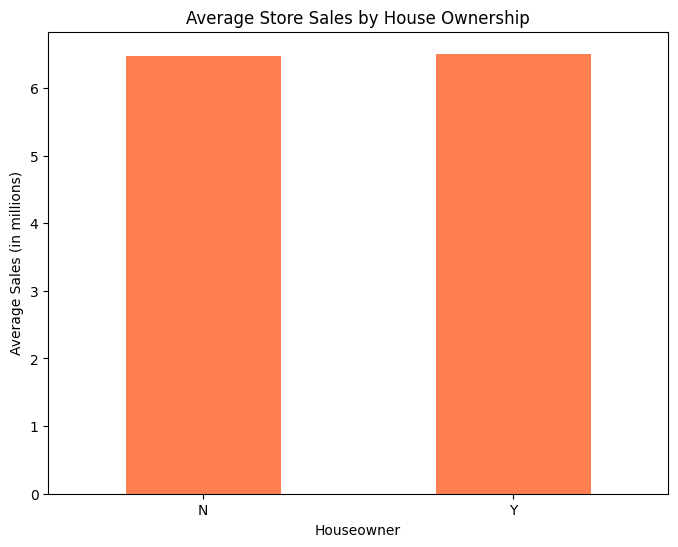

In [25]:
houseowner_sales = selected_df.groupby('houseowner')['store_sales(in millions)'].mean()

plt.figure(figsize=(8, 6))
houseowner_sales.plot(kind='bar', color='coral')
plt.title('Average Store Sales by House Ownership')
plt.xlabel('Houseowner')
plt.ylabel('Average Sales (in millions)')

plt.xticks(rotation=0)
plt.show()

In [26]:
correlation_coefficient, p_value = pearsonr(df['store_sales(in millions)'], pd.factorize(df['houseowner'])[0])

# output
print(f"상관계수: {correlation_coefficient}")
print(f"p_value: {p_value}")

상관계수: -0.005140400584198595
p_value: 0.2915865434819882


## 성별과 결혼 상태에 따른 매출 분석



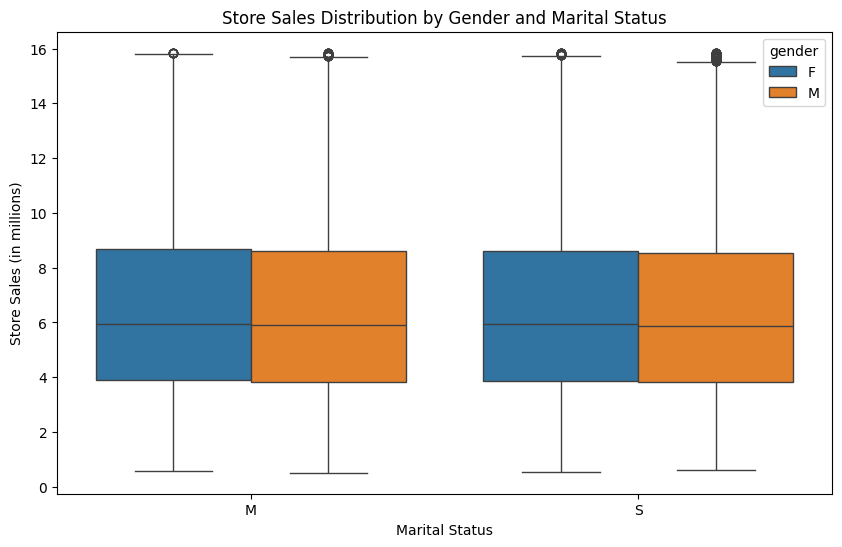

In [27]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='marital_status', y='store_sales(in millions)', hue='gender', data=selected_df)
plt.title('Store Sales Distribution by Gender and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Store Sales (in millions)')

plt.show()



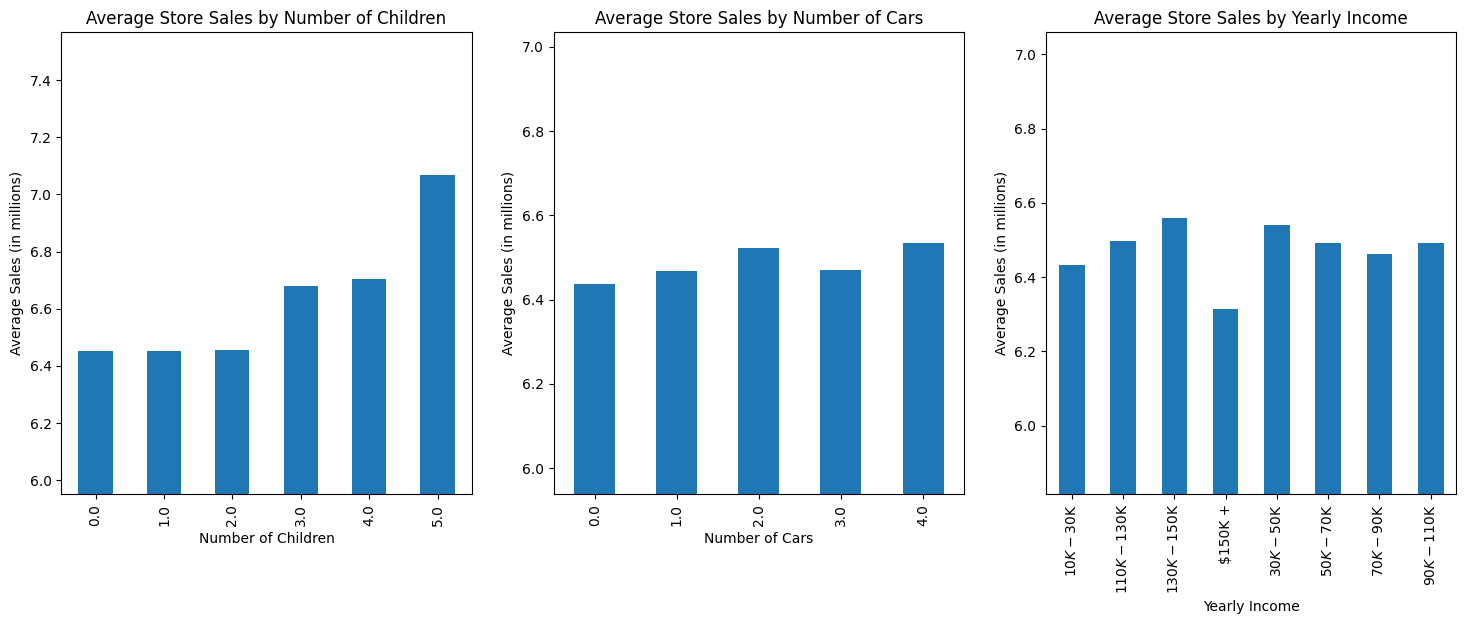

In [28]:
# 생활 패턴별 매출 분석
children_sales = selected_df.groupby('num_children_at_home')['store_sales(in millions)'].mean()
cars_sales = selected_df.groupby('avg_cars_at home(approx)')['store_sales(in millions)'].mean()
income_sales = selected_df.groupby('avg_yearly_income')['store_sales(in millions)'].mean()

# 시각화
plt.figure(figsize=(18, 6))

# 자녀 수별 매출
plt.subplot(1, 3, 1)
children_sales.plot(kind='bar')
plt.title('Average Store Sales by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Sales (in millions)')
plt.ylim(children_sales.min() - 0.5, children_sales.max() + 0.5)

# 자동차 수별 매출
plt.subplot(1, 3, 2)
cars_sales.plot(kind='bar')
plt.title('Average Store Sales by Number of Cars')
plt.xlabel('Number of Cars')
plt.ylabel('Average Sales (in millions)')
plt.ylim(cars_sales.min() - 0.5, cars_sales.max() + 0.5)

# 연간 소득별 매출
plt.subplot(1, 3, 3)
income_sales.plot(kind='bar')
plt.title('Average Store Sales by Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Average Sales (in millions)')
plt.ylim(income_sales.min() - 0.5, income_sales.max() + 0.5)

plt.show()


## 선형 회귀 모델을 사용하여 매출에 영향을 미치는 고객 특성들을 파악

In [29]:
# 독립 변수와 종속 변수 정의
X = selected_df[['gender', 'marital_status', 'education', 'occupation', 'houseowner']]  # 독립 변수 (고객 특성)
y = selected_df['store_sales(in millions)']  # 종속 변수 (매출)

# 원-핫 인코딩으로 범주형 변수 변환
X_encoded = pd.get_dummies(X, drop_first=True)

# 선형 회귀 모델 적합
model = sm.OLS(y, sm.add_constant(X_encoded)).fit()

# 결과 요약
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     store_sales(in millions)   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     1.361
Date:                      Mon, 22 Jan 2024   Prob (F-statistic):              0.184
Time:                              09:34:39   Log-Likelihood:            -1.1027e+05
No. Observations:                     42096   AIC:                         2.206e+05
Df Residuals:                         42084   BIC:                         2.207e+05
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

## **모델의 설명력이 낮음**
이 모델은 매출 데이터의 변동을 거의 설명하지 못함. 결정계수(R-squared)가 0에 가깝기 때문에, 선택한 독립 변수들이 매출을 잘 예측하거나 설명하지 못한다는 것을 의미함.

## **대부분의 변수들이 통계적으로 유의하지 않음**
대부분의 변수들의 P-value가 0.05 이상으로, 이들이 매출에 미치는 영향이 통계적으로 유의미하지 않다는 것을 나타냄. 즉, 이 변수들이 매출에 끼치는 영향은 우연에 의한 것일 수 있음.

## **계수의 값과 의미**
각 변수의 계수는 매출에 미치는 영향의 크기와 방향을 나타냅니다. 예를 들어, 남성(gender_M)의 계수가 음수라는 것은, 다른 모든 조건이 동일할 때 남성 고객의 매출이 여성 고객보다 약간 낮다는 것을 의미. 그러나 이 차이는 통계적으로 유의미하지 않음.

# 고객 세분화 분석




In [30]:
  def income_to_numeric(income_str):
      income_str = income_str.replace('$', '').replace('K', '')
      if '-' in income_str:
          low, high = income_str.split(' - ')
          return (int(low) + int(high)) / 2 * 1000
      elif '+' in income_str:
          return float(income_str.replace('+', '')) * 1000
      else:
          return float(income_str) * 1000

<ipython-input-31-a44d83c5d3ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['avg_yearly_income_numeric'] = selected_df['avg_yearly_income'].apply(income_to_numeric)
<ipython-input-31-a44d83c5d3ed>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.loc[:, 'segment'] = kmeans.labels_


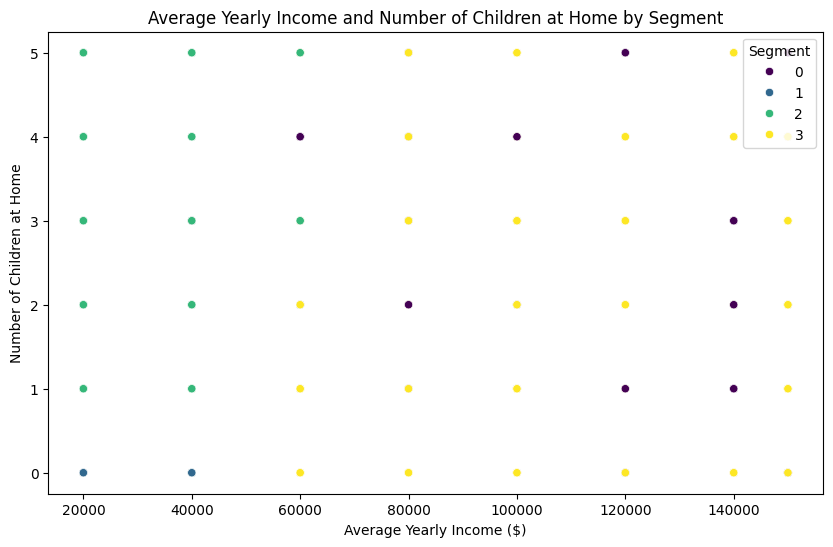

In [31]:
# 'avg_yearly_income' to numeric
selected_df['avg_yearly_income_numeric'] = selected_df['avg_yearly_income'].apply(income_to_numeric)

# categorical variable to one-hot encoding
categorical_features = ['marital_status', 'gender', 'education', 'occupation', 'houseowner']
selected_df_encoded = pd.get_dummies(selected_df[categorical_features])

# numeric + categoric
numerical_features = selected_df[['num_children_at_home', 'avg_cars_at home(approx)', 'avg_yearly_income_numeric']]
X = pd.concat([numerical_features, selected_df_encoded], axis=1)

# data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(X_scaled)
# K-Means 클러스터링을 수행한 후, 'segment' 컬럼을 추가합니다.
selected_df.loc[:, 'segment'] = kmeans.labels_

# 산점도를 그리기 위한 준비
plt.figure(figsize=(10, 6))

# 산점도 그리기
# segment 컬럼을 기준으로 색깔을 다르게 하여 각 세그먼트를 구별할 수 있게 합니다.
sns.scatterplot(data=selected_df, x='avg_yearly_income_numeric', y='num_children_at_home', hue='segment', palette='viridis')

# 제목 및 축 이름 설정
plt.title('Average Yearly Income and Number of Children at Home by Segment')
plt.xlabel('Average Yearly Income ($)')
plt.ylabel('Number of Children at Home')

# 범례 표시
plt.legend(title='Segment')

# 플롯 보여주기
plt.show()

## Segment
- Segment 1 group 은 상대적으로 낮은 소득과 가정 내 아이들의 수가 적거나 없는 고객
=> 예산에 민감하고 가성비가 높은 제품들을 추천하는 것이 좋다고 판단됨.

- Segment 2 group 은 중간 소득 범위에 속하며, 가정 내 아이들의 수가 비교적 많은 수에 속하므로 아이들을 위한 제품이나 서비스에 관심이 많을 수 있으므로 이러한 제품을 추천하는 것이 좋다고 판단됨.

- Segment 3 group 은 고소득이지만 아이들이 없거나 한, 두명인 고객들이 포함되어 있으므로 이 그룹에게는 럭셔리한 제품이나 프리미엄 서비스를 제공하는 것을 추천.

## Segment by sales rate

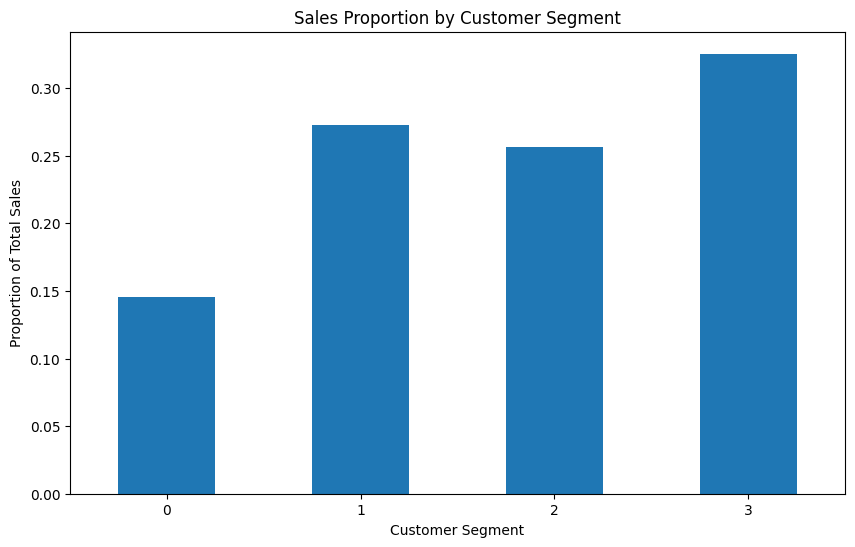

In [39]:
# 각 세그먼트별 매출의 합계를 계산합니다.
segment_sales = selected_df.groupby('segment')['store_sales(in millions)'].sum()

# 전체 매출의 합계를 계산합니다.
total_sales = selected_df['store_sales(in millions)'].sum()

# 각 세그먼트별 매출이 전체 매출에서 차지하는 비율을 계산합니다.
segment_sales_proportion = segment_sales / total_sales

# 각 세그먼트별 매출 비중을 시각화합니다.
plt.figure(figsize=(10, 6))
segment_sales_proportion.plot(kind='bar')
plt.title('Sales Proportion by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion of Total Sales')
plt.xticks(rotation=0)
plt.show()

## ANOVA test (Segement by rate)

In [33]:
# 데이터셋에서 각 세그먼트별로 매출 데이터를 그룹화
segments_grouped = selected_df.groupby('segment')

# ANOVA 테스트를 수행할 데이터셋을 준비
segment0_sales = segments_grouped['store_sales(in millions)'].get_group(0)
segment1_sales = segments_grouped['store_sales(in millions)'].get_group(1)
segment2_sales = segments_grouped['store_sales(in millions)'].get_group(2)
segment3_sales = segments_grouped['store_sales(in millions)'].get_group(3)

# ANOVA 테스트 수행
f_val, p_val = stats.f_oneway(segment0_sales, segment1_sales, segment2_sales, segment3_sales)

# 결과 출력
print("ANOVA test for mean sales across segments")
print("F-Statistic:", f_val)
print("P-value:", p_val)

ANOVA test for mean sales across segments
F-Statistic: 0.5157040680126302
P-value: 0.6714426126257917


- ANOVA 테스트의 p-값이 0.05 이상인 경우, 통계적으로 유의미한 차이가 없다는 결론을 내릴 수 있음.
- 따라서, 우리는 네 세그먼트가 평균적으로 비슷한 매출을 생성한다고 할 수 있음.

In [34]:
# 'avg_yearly_income_numeric' check
if 'avg_yearly_income_numeric' in selected_df.columns and selected_df['avg_yearly_income_numeric'].dtype in [np.float64, np.int64]:
    # 'education' by group
    groups = selected_df.groupby('education')['avg_yearly_income_numeric'].apply(list)
    # ANOVA
    f_value, p_value = stats.f_oneway(*groups)
    print(f"ANOVA test for 'avg_yearly_income_numeric' across education levels: F={f_value}, p={p_value}")
else:
    print("The 'avg_yearly_income_numeric' column is not ready for ANOVA.")

# 'marital_status' and 'houseowner' check

# cross table create
crosstab = pd.crosstab(selected_df['marital_status'], selected_df['houseowner'])

# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"Chi-Square test for independence between 'marital_status' and 'houseowner': chi2={chi2}, p={p}")

ANOVA test for 'avg_yearly_income_numeric' across education levels: F=2583.6727438122075, p=0.0
Chi-Square test for independence between 'marital_status' and 'houseowner': chi2=3408.001142292731, p=0.0


<ipython-input-41-f29272e60889>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.loc[:, 'segment'] = kmeans.labels_


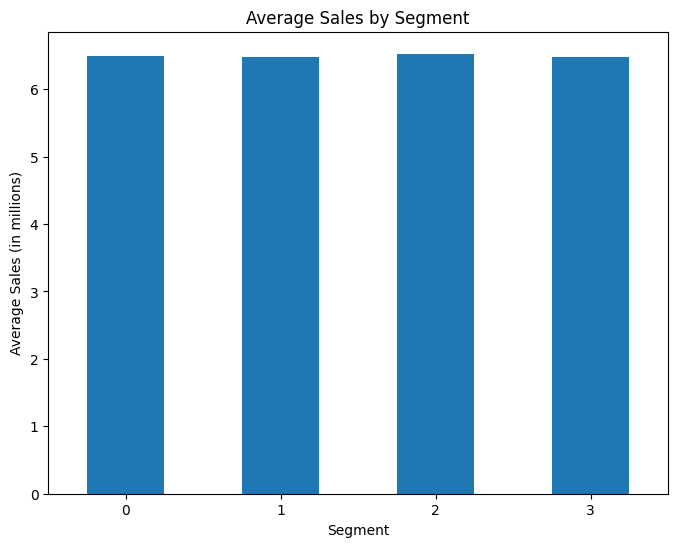

In [41]:
# 수치형 및 encoding된 범주형 데이터 시각화
numerical_features = selected_df[['num_children_at_home', 'avg_cars_at home(approx)', 'avg_yearly_income_numeric']]
X = pd.concat([numerical_features, selected_df_encoded], axis=1)

# data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(X_scaled)
selected_df.loc[:, 'segment'] = kmeans.labels_

# avg_sale by segment
segment_mean_sales = selected_df.groupby('segment')['store_sales(in millions)'].mean()

# 평균 매출이 가장 높은 세그먼트의 인덱스
top_segment_index = segment_mean_sales.idxmax()

# 세그먼트별 평균 매출을 시각화
plt.figure(figsize=(8, 6))
segment_mean_sales.plot(kind='bar')
plt.title('Average Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Sales (in millions)')
plt.xticks(rotation=0)
plt.show()


## 교육 수준과 연간 소득의 관계 (ANOVA 분석):

분석 결과, 교육 수준에 따른 연간 소득의 차이가 통계적으로 매우 유의미한 것으로 나타남(F-값: 3650.6, p-값: 0.0).
=> 이는 교육 수준이 높은 고객 그룹이 상대적으로 높은 소득을 가질 가능성이 높음을 시사합니다.
따라서, 고등 교육을 받은 고객층을 대상으로 한 프리미엄 제품 또는 고급 서비스 관련 마케팅 전략이 효과적일 것으로 예상됨.

## 결혼 상태와 주택 소유 여부의 연관성 (카이제곱 검정)

결혼 상태와 주택 소유 여부 간에는 통계적으로 유의미한 관계가 확인됨 (카이제곱 통계량: 4805.7, p-값: 0.0).
이러한 결과는 결혼한 고객층이 집을 소유할 확률이 더 높다는 것을 나타냄.
이를 바탕으로 결혼한 고객층을 대상으로 한 주택 관련 제품이나 서비스의 마케팅이 효과적일 수 있음.

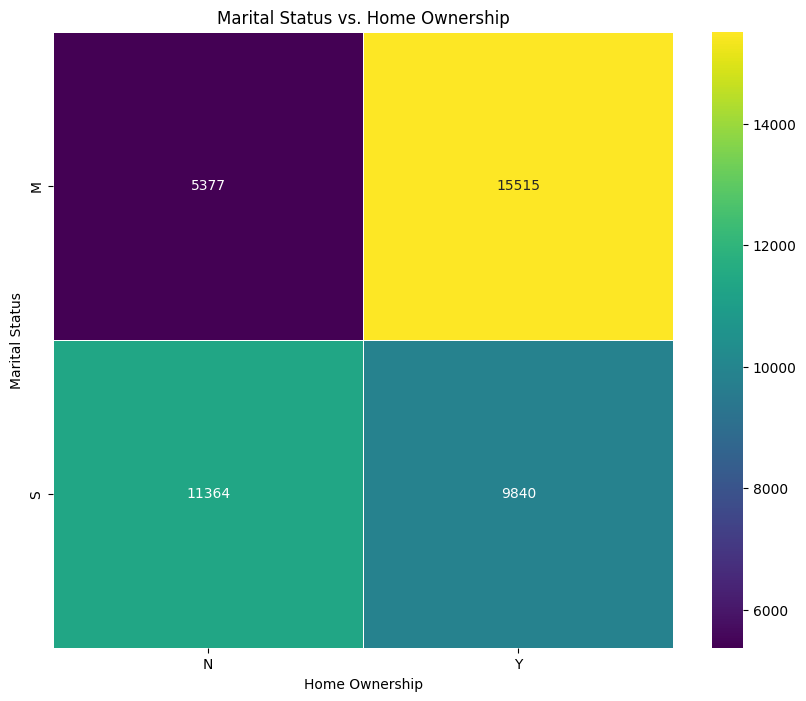

In [38]:
contingency_table = pd.crosstab(selected_df['marital_status'], selected_df['houseowner'])

# seaborn의 heatmap 함수를 사용해 교차표를 히트맵으로 시각화합니다.
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Marital Status vs. Home Ownership')
plt.ylabel('Marital Status')
plt.xlabel('Home Ownership')
plt.show()